# Supermarket Chain Sales Prediction

### This data-set is created to predict the sales of Supermarket chain.The data is of the year 2013 for 1559 products across 10 stores in different cities. We used this information to identify the products and stores which play a key role in their Sales and use this information to take correct measures for the sucess of their Business.Steps like Data visualization, data quality, EDA, various machine learning algorithms, hyperparameter tuning and model’s assumption checking have been implemented.

### Importing necessary Packages

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt

# Library for the statistic data vizualisation
import seaborn as sns

%matplotlib inline

#### Finding the current working directory and storing it in a variable

In [1]:
%pwd

'C:\\Users\\sat2d\\OneDrive\\Desktop\\Project'

In [4]:
path='/Users/sagangwa/Desktop/Project'

#### Reading the data from csv file and checking all columns in the data set

In [5]:
train = pd.read_csv(f'{path}/train.csv')
print(train.shape)
train.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test = pd.read_csv(f'{path}/test.csv')
print(test.shape)
test.head()

(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
#checking data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [8]:
#Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Checking for Duplicates

In [9]:
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


## Exploratory Data Analysis (EDA)

### Univariate Distribution

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

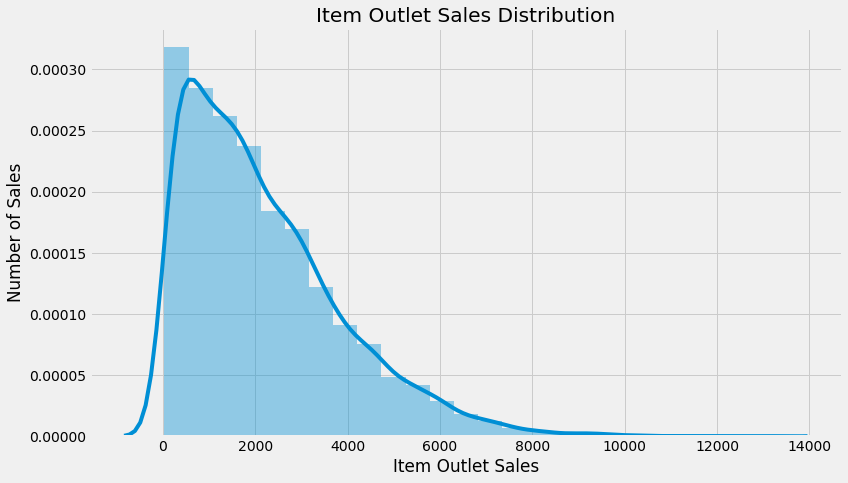

In [10]:
#Distribution of the target variable : Item_Outlet_Sales
#Plotting Histogram to show the distribution of numeric variables
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain',axis='x', scilimits=(0,1))
plt.xlabel("Item Outlet Sales")
plt.ylabel("Number of Sales")
plt.title("Item Outlet Sales Distribution")

In [11]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


#### Numerical Variables

In [12]:
#Checking which features are numeric
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

#### Checking correlations between numeric predictors and target variable and printing values in ascending order

In [13]:
 numeric_features.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [14]:
corr = numeric_features.corr()

print (corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


#### Correlation matrix

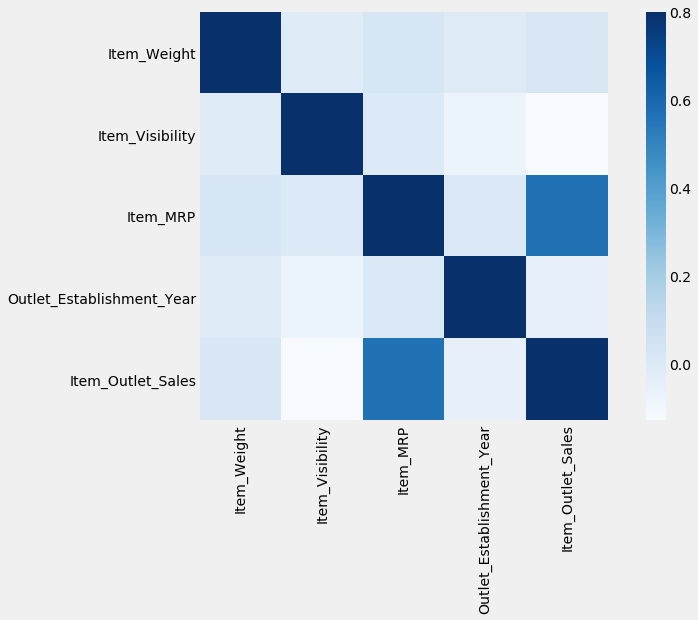

In [15]:
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr,cmap="Blues", vmax=.8, square=True);

#### Categorical Variables

In [63]:
#Distribution of the Item_Fat_Content
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

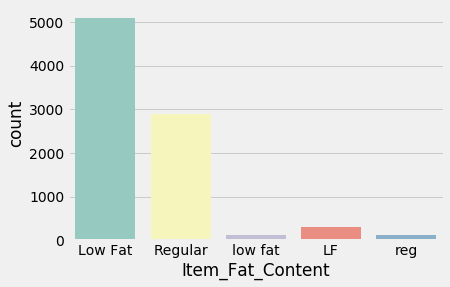

In [64]:
#Correcting two type of FATS writen in different manner ('REGULAR','LOW')
sns.countplot(train.Item_Fat_Content,palette="Set3")

In [65]:
#Distribution of the Item_Type
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

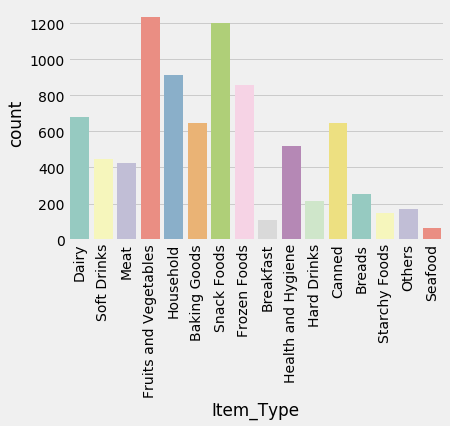

In [66]:
#The graph below shows 16 different unique values in a Categorical Variable
#This is high number so has to be reduced
sns.countplot(train.Item_Type,palette="Set3")
plt.xticks(rotation=90)

In [67]:
#Distribution of the Outlet_Size
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

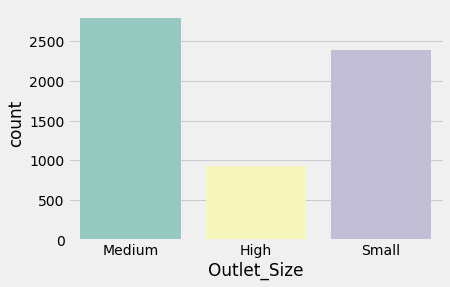

In [68]:
#The graph implies there are less number of stores with  outlet size=high, most stores are either small or medium in size
sns.countplot(train.Outlet_Size,palette="Set3")

In [69]:
#Distribution of the Outlet_Location_Type
#Gives count of outlet_location_type
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

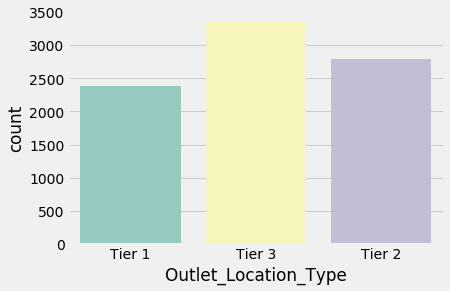

In [70]:
sns.countplot(train.Outlet_Location_Type,palette="Set3")

In [71]:
#Distribution of the Outlet_Type
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

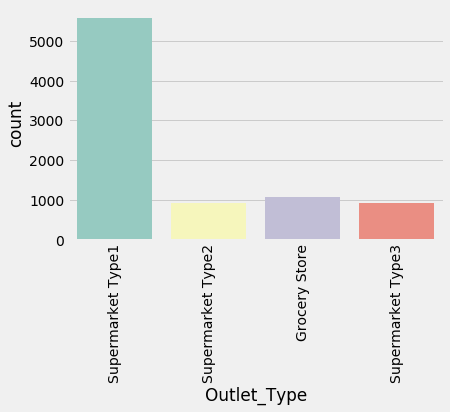

In [72]:
#From the graph we can conclude Supermarket type2,Grocery Store,Supermarket type3 have low expression in this distribution
sns.countplot(train.Outlet_Type,palette="Set3")
plt.xticks(rotation=90)

### Bivariate Distribution

#### Numerical Variables

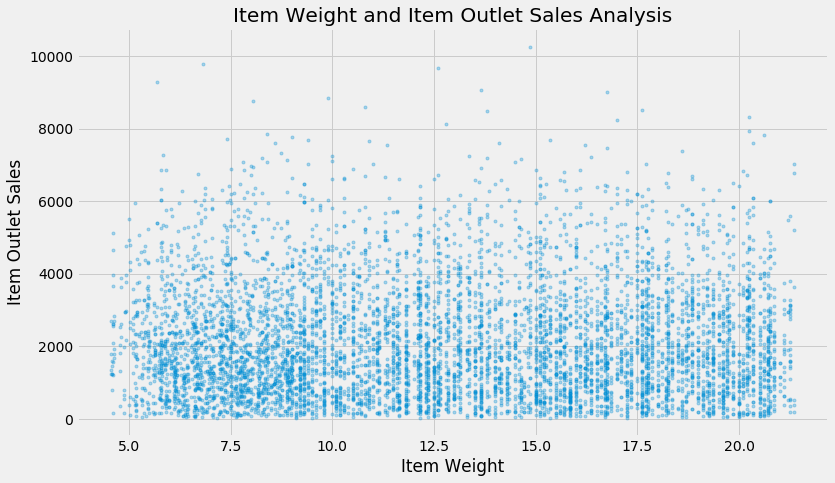

In [73]:
#Item_Weight and Item_Outlet_Sales Analysis
#Plotting a scatterplot to see the relationship between the correlation of 'Item_Weight' and our target variable-'Item_outlet_Sales' 
plt.figure(figsize=(12,7))
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet Sales")
plt.title("Item Weight and Item Outlet Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

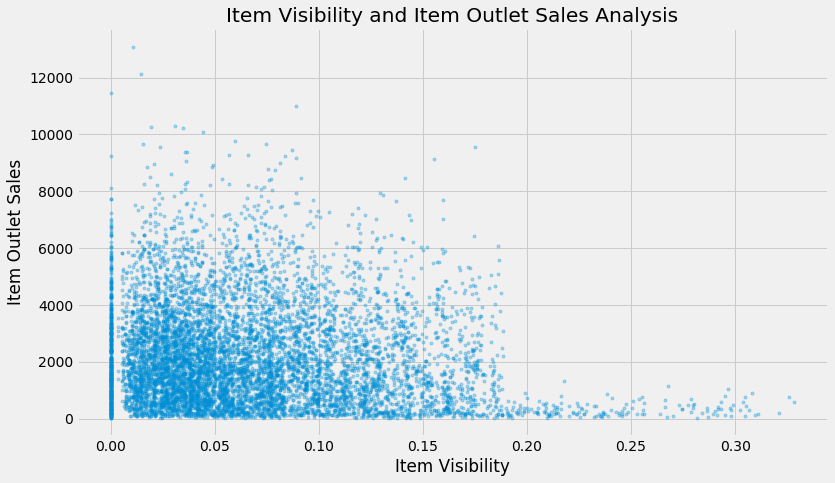

In [74]:
#Item Visibility and Item Outlet Sales Analysis
#Plotting scatter plot to see low visiblity products are sold the most
plt.figure(figsize=(12,7))
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.title("Item Visibility and Item Outlet Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

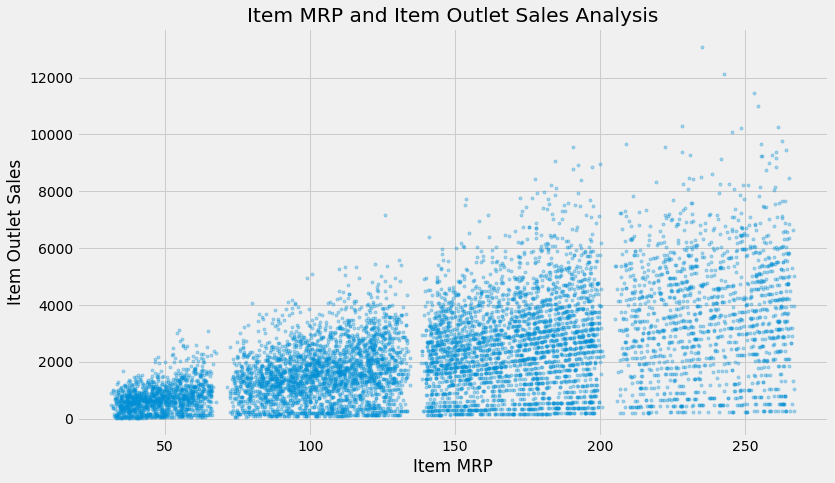

In [75]:
#Plotting Item MRP and Item Outlet Sales 
plt.figure(figsize=(12,7))
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Item MRP and Item Outlet Sales Analysis")
plt.plot(train.Item_MRP, train["Item_Outlet_Sales"],'.', alpha = 0.3)

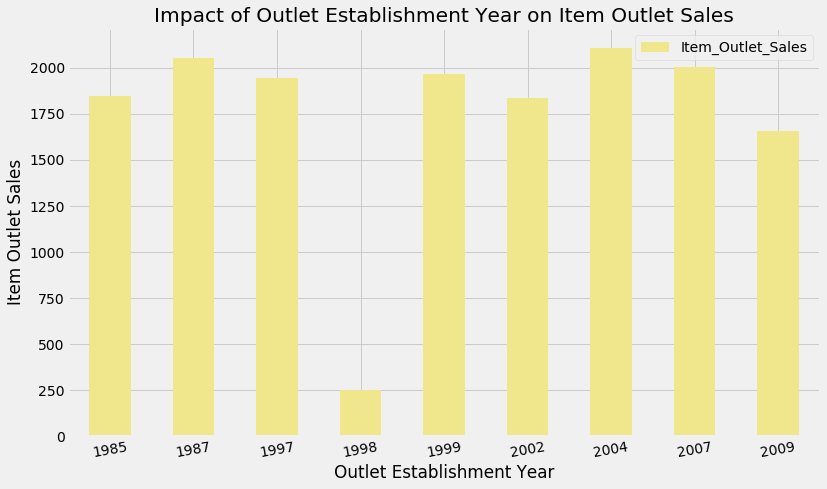

In [76]:
#Outlet Establishment Year and Item Outlet Sales Analysis
Outlet_Establishment_Year_pivot = \
train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='khaki',figsize=(12,7))
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Establishment Year on Item Outlet Sales")
plt.xticks(rotation=10)
plt.show()

#### Categorical Variables

In [77]:
#Seeing if they are of object data types
numeric_features = train.select_dtypes(include=[np.object])
numeric_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

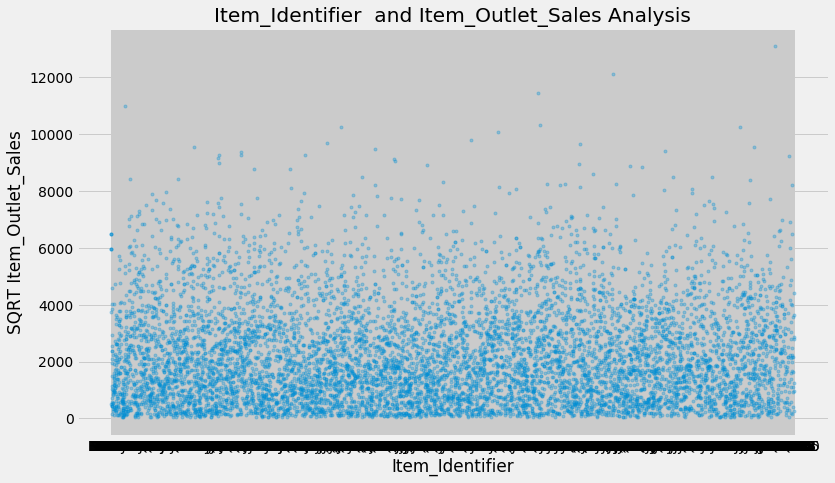

In [78]:
#Impact of Item Identifier on Item Outlet Sales
plt.figure(figsize=(12,7))
plt.xlabel("Item_Identifier")
plt.ylabel("SQRT Item_Outlet_Sales")
plt.title("Item_Identifier  and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Identifier , train["Item_Outlet_Sales"],'.', alpha = 0.3)

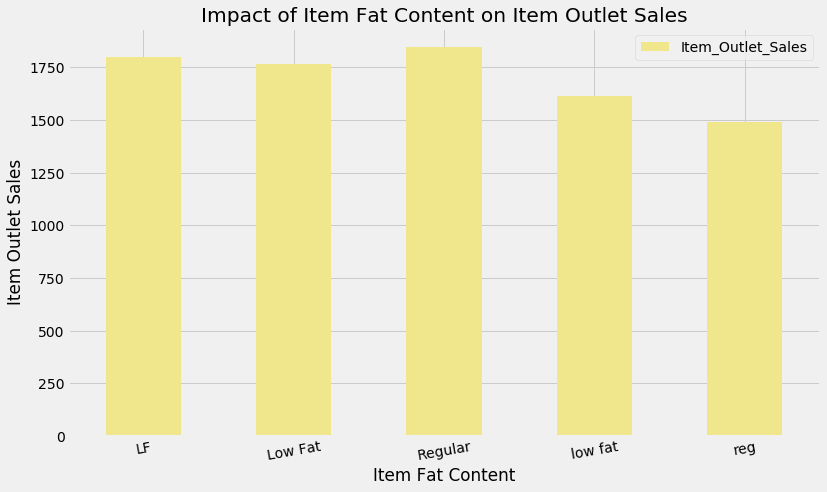

In [79]:
#Impact of Item Fat Content on Item Outlet Sales
#The bar graph shows that low fat products have higher sales value than regular products 
Item_Fat_Content_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='khaki',figsize=(12,7))
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Item Fat Content on Item Outlet Sales")
plt.xticks(rotation=10)
plt.show()

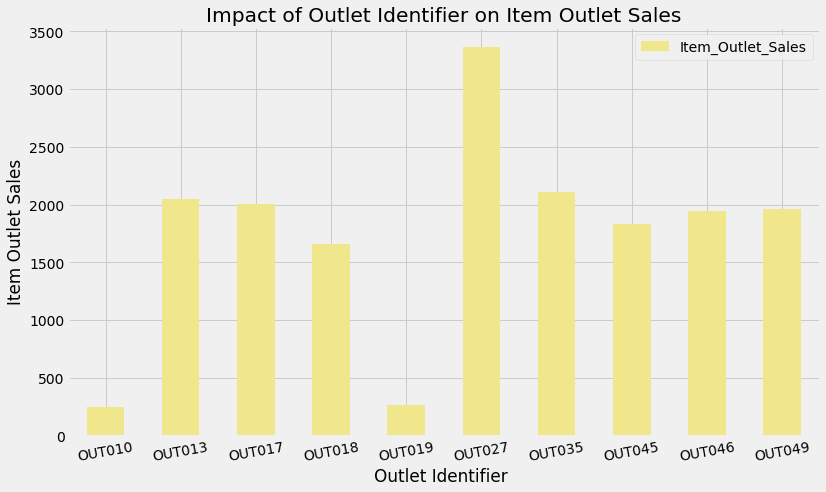

In [80]:
#Impact of Outlet Identifier on Item Outlet Sales
#From the graph and pivot table below we can infer that out of 10 stores, 2 are Groceries,6 are Supermarket Type1, 1 Supermarket Type2 and one Supermarket Type3
#The Grocery stores have the lowest sales result followed by Supermarket Type2.
#The best sales results have been obtained from Supermarket Type3.
Outlet_Identifier_pivot = \
train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar', color='khaki',figsize=(12,7))
plt.xlabel("Outlet Identifier ")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Identifier on Item Outlet Sales")
plt.xticks(rotation=10)
plt.show()

In [81]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [82]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


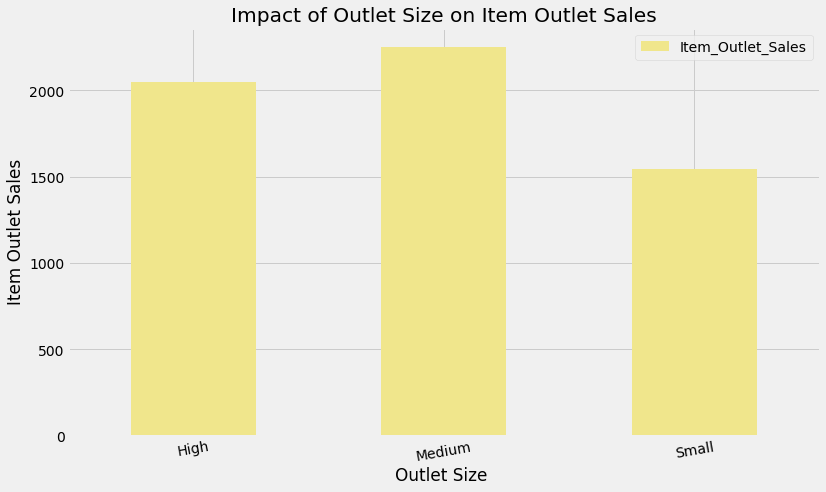

In [83]:
#Impact of Outlet Size on Item Outlet Sales
#Graph below depicts that consumers prefer stores of medium size more than high and small size stores
Outlet_Size_pivot = \
train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar', color='khaki',figsize=(12,7))
plt.xlabel("Outlet Size ")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Size on Item Outlet Sales")
plt.xticks(rotation=10)
plt.show()

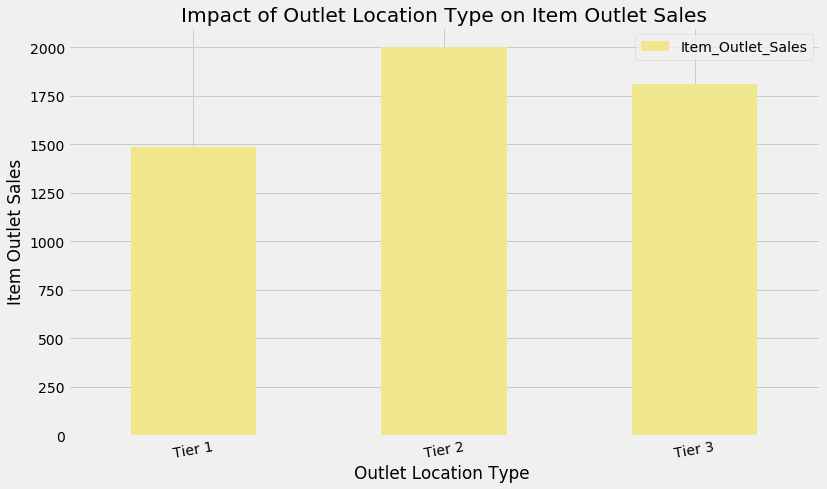

In [84]:
#Impact of Outlet_Location_Type on Item_Outlet_Sales
#From the graph and pivot table it is clear to see that Tire2 and Tire3 cities have the highest sales results 
Outlet_Location_Type_pivot = \
train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Location_Type_pivot.plot(kind='bar', color='khaki',figsize=(12,7))
plt.xlabel("Outlet Location Type ")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Location Type on Item Outlet Sales")
plt.xticks(rotation=10)
plt.show()

In [85]:
train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


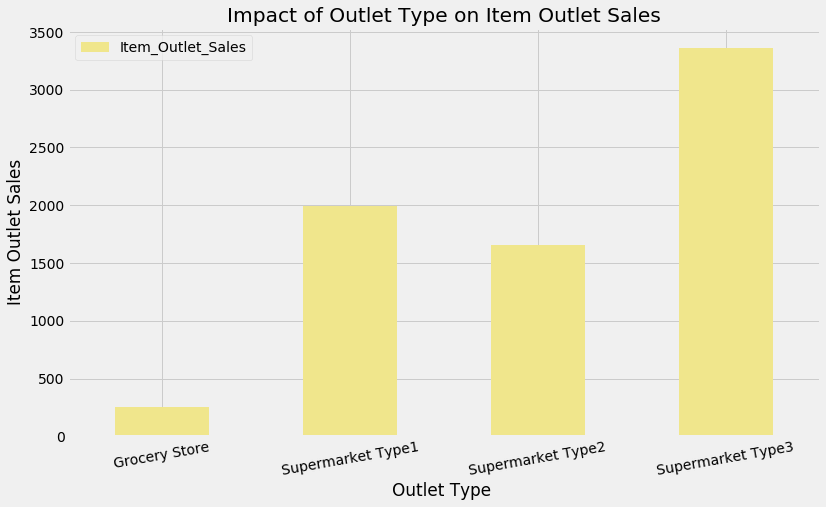

In [86]:
#Impact of Outlet_Type on Item_Outlet_Sales
#The graph below creats a new features to show the sales ratio according to the store size
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='khaki',figsize=(12,7))
plt.xlabel("Outlet Type ")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Type on Item Outlet Sales")
plt.xticks(rotation=10)
plt.show()

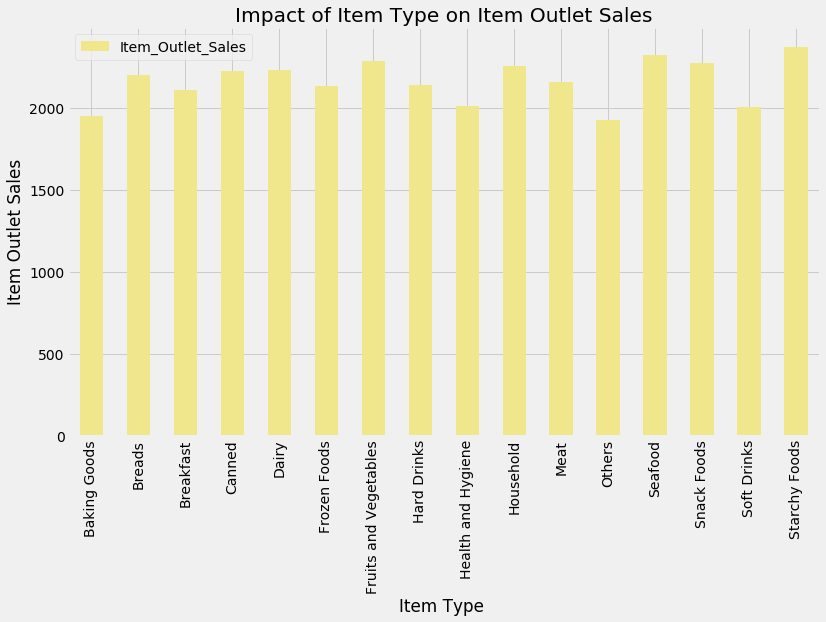

In [87]:
#Impact of Item_Type on Item_Outlet_Sales
#Graph shows the impact each item type has on the sales 
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='khaki',figsize=(12,7))
plt.xlabel("Item Type ")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Item Type on Item Outlet Sales")
plt.xticks(rotation=90)
plt.show()

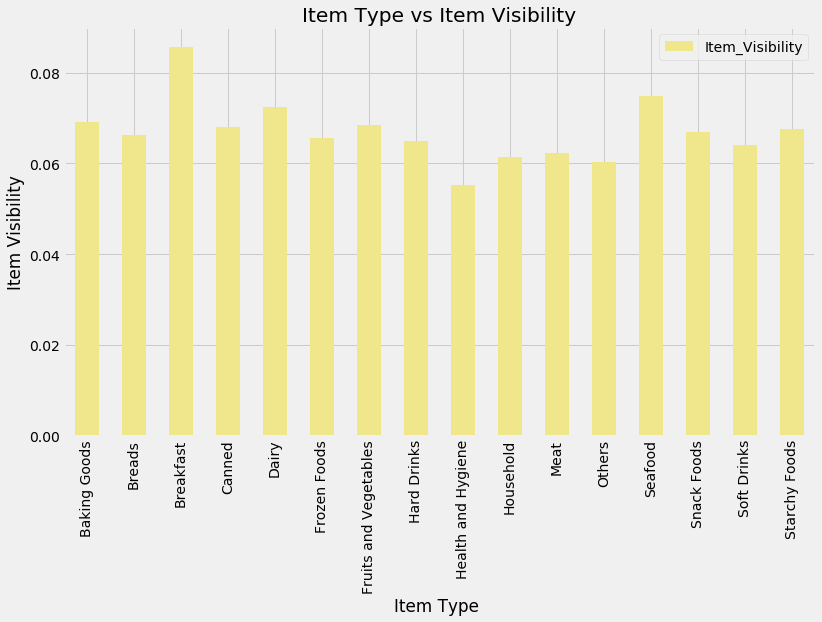

In [88]:
#Impact of Item_Type vs Item_Visibility
#Graph to show which product is more visibly displayed on racks to the customer
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='khaki',figsize=(12,7))
plt.xlabel("Item Type ")
plt.ylabel("Item Visibility")
plt.title("Item Type vs Item Visibility")
plt.xticks(rotation=90)
plt.show()

## Data Pre-Processing

#### Looking for missing values

In [89]:
#Joining Train and Test Dataset
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True)
data.to_csv(f'{path}/data.csv',index=False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


#### Data Imputation

In [90]:
#Since aggegrate function is mean by default it ignores NaN
#Imputing missing values
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [91]:
#Taking the mean of the weights of all the products to fill in the missing values
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

From the output we can clearly see that originally there were 2439 missing values and after filling those rows there are 0 NaN values

In [92]:
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


#### Imputing Outlet_size  with the mode

In [93]:
#Importing mode function 
#Determing the mode for each Outlet_size
from scipy.stats import mode

outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [94]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


From the output we can clearly see that originally there were 4016 missing values and after filling those rows there are 0 NaN values

### Feature Engineering

In [95]:
#Creating pivot table with Outlet_Type and the mean of Item_Outlet_Sales. 
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [96]:
#As seen above the visibility of some items were 0 which is not possible because every product has some visibility atleast
#Therefore I consider these 0 values as missing values and imputed them by taking the mean
#Item_Visibility minimum value 0
#Getting all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [97]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


In [112]:
#Determine the years of operation of a store
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

 Creating a broad category of Type of Item

To improve our analysis I am going to combine these into broader categories, namely- Food,Non-Consumable,Drinks

In [113]:
#Getting the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Renaming the characters to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

 Modifying categories of Item_Fat_Content

The same kind of categories are represented in different manners,hence I corrected the column names 

In [114]:
#Changing categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


There were some non-consumable items with low-fat.Hence Seperating that as Non-Edible  

In [115]:
#Marking non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Feature Transformations

In [116]:
#Creating variable Item_Visibility_MeanRatio
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [117]:
#Numerical and Categorical Variables – Dummy variables
#Since Scikit-learn accepts numerical variables only, convertiong all Categorical variables to Numerical type
#Importing Scikit-learn library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Assigning new variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [118]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [119]:
#Droping the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Dividing into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Droping unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Exporting files as modified versions:
train.to_csv(f'{path}/train_modified.csv',index=False)
test.to_csv(f'{path}/test_modified.csv',index=False)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Modeling, predicting and solving the problem

In [121]:
train_df = pd.read_csv(f'{path}/train_modified.csv')
test_df = pd.read_csv(f'{path}/test_modified.csv')

In [123]:
#Defining target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn import metrics


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fitting the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predicting training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Performing cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Printing model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predicting on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Exporting submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

### Linear Regression Model


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.43 | Min - 1074 | Max - 1210


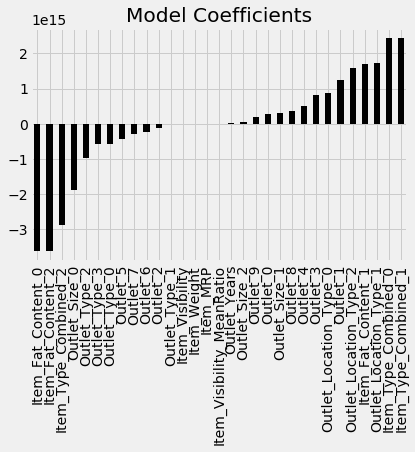

In [210]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar',color='black', title='Model Coefficients')

### Ridge Regression Model


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


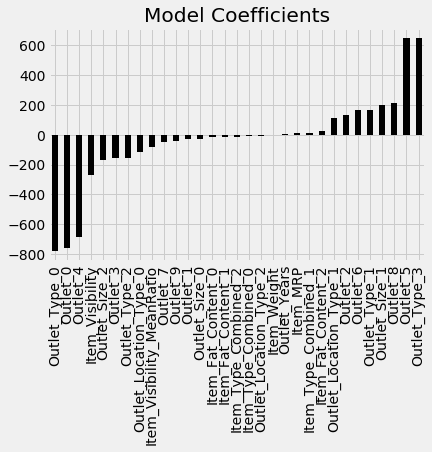

In [211]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar',color='black', title='Model Coefficients')

### Decision Tree Model


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


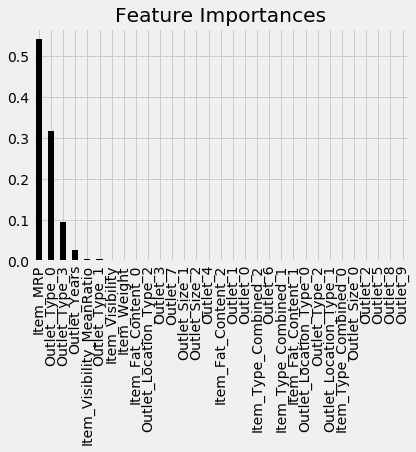

In [212]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar',color='black', title='Feature Importances')

### Random Forest Model


Model Report
RMSE : 1069
CV Score : Mean - 1097 | Std - 43.41 | Min - 1028 | Max - 1180


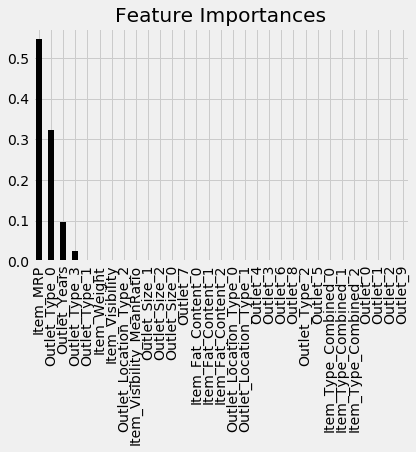

In [213]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar',color='black', title='Feature Importances')

### XGBoost

In [141]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:41:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [156]:
#Predicting training set:
train_df_predictions = my_model.predict(train_df[predictors])

#Making predictions
predictions = my_model.predict(test_df[predictors])

In [158]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGboost.csv", index=False)

Mean Absolute Error : 129.9078038223221
RMSE : 1052


In [149]:
#Sending the final output to a csv
Output = pd.read_csv(f'{path}/XGboost.csv')

In [150]:
Output.head(20)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1509.432313
1,FDW14,OUT017,1364.049154
2,NCN55,OUT010,542.975540
3,FDQ58,OUT017,2384.015126
4,FDY38,OUT027,5669.163351
5,FDH56,OUT046,1874.430960
6,FDL48,OUT018,754.596096
7,FDC48,OUT027,2513.079855
8,FDN33,OUT045,1554.007076
9,FDA36,OUT017,3087.507511
